In [1]:
 import pandas as pd
import numpy as np
import numpy.ma as ma
import math as m
import matplotlib.pyplot as plt;
#plt.rcdefaults()
import seaborn as sns
import statistics as st
from IPython.display import display, HTML
import re

In [26]:
data = pd.read_csv("test.csv")

display(HTML(data.to_html()))

pass_ID=data.iloc[:,0]
pclass=data.iloc[:,1]
name=data.iloc[:,2]
sex=data.iloc[:,3]
age=data.iloc[:,4]
sibsp=data.iloc[:,5]
parch=data.iloc[:,6]
ticket=data.iloc[:,7]
fare=data.iloc[:,8]
cabin=data.iloc[:,9]
embarked=data.iloc[:,10]

NR=np.size(np.array(pclass),axis=0);
nann=[];

for i in range(11):
    
    nann.append(np.size(np.where(data.iloc[:,i].isna())))
    
    

print('Embarked has '+str(nann[10])+' NaN values-> '+str(nann[10]/NR *100)+'%')
print('Age has '+str(nann[4])+' NaN values-> '+str(nann[4]/NR *100)+'%')
print('Cabin has '+str(nann[9])+' NaN values-> '+str(nann[9]/NR *100)+'%')



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


Embarked has 0 NaN values-> 0.0%
Age has 86 NaN values-> 20.574162679425836%
Cabin has 327 NaN values-> 78.22966507177034%


In [11]:
Mr= name.str.find('Mr.')

Miss= name.str.find('Miss')

Mrs= name.str.find('Mrs')

Master= name.str.find('Master')

Rev= name.str.find('Rev')

Dr= name.str.find('Dr')

Col= name.str.find('Col')

o=Mr*Mrs;

for i in range(NR):
    
    if o[i]>0 and o[i]!=1:
        
        Mr[i]=-1;
        
title=[];
a1=0;
a2=0;
a3=0;
a4=0;
a5=0;
a6=0;
a7=0;
    
for i in range(NR):
    
    if Mr[i]>0:
        
        title.append('Mr')
        a1=a1+1
        
    elif Miss[i]>0:
        
        title.append('Miss')
        a2=a2+1
        
    elif Mrs[i]>0:
        
        title.append('Mrs')
        a3=a3+1
        
    elif Master[i]>0:
        
        title.append('Master')
        a4=a4+1
        
    elif Dr[i]>0:
        
        title.append('Dr')
        a5=a5+1
        
    elif Rev[i]>0:
        
        title.append('Rev')
        a6=a6+1
        
    
    elif Col[i]>0:
        
        title.append('Col')
        a7=a7+1
        
    else :
        
        title.append('others')
    
        
print('we have '+str( a1 )+' Mr title')
print('we have '+str( a2 )+' Miss title')
print('we have '+str( a3 )+' Mrs title')
print('we have '+str( a4 )+' Master title')
print('we have '+str( a5 )+' Dr title')
print('we have '+str( a6 )+' Rev title')
print('we have '+str( a7 )+' Col title')


for i in range(NR):
    
    if (title[i] is 'Miss')or(title[i] is 'Mrs'):
        
        title[i]='Mrss'
        
    if (title[i]!='Mr')and((title[i] !='Mrss')) :
        
        title[i]='others'
        
        
title=pd.DataFrame(title);

e1=np.where(np.hstack(np.array(title)=='Mr'))

e2=np.where(np.hstack(np.array(title)=='Mrss'))

e3=np.where(np.hstack(np.array(title)=='others'))

Title=np.ones([NR,1]);

Title[e2]=2;
Title[e3]=3;

Title=pd.DataFrame(Title);

data.insert(4, "Title",Title, True);

we have 240 Mr title
we have 78 Miss title
we have 72 Mrs title
we have 21 Master title
we have 1 Dr title
we have 2 Rev title
we have 2 Col title


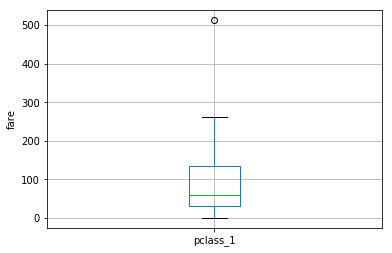

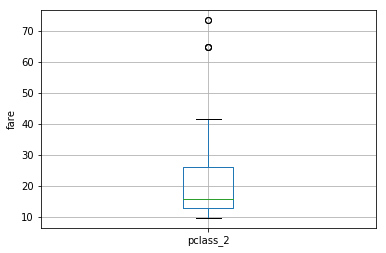

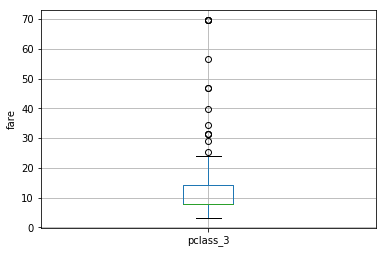

In [12]:
npfare=np.array(fare)
k=np.where(fare.isna())
mode_fare=fare.mode();
npfare[k]=mode_fare;

k=np.hstack(np.array(fare)==0)
npfare=np.array(fare)

k1=np.where(np.hstack(np.array(pclass)==1))
k2=np.where(np.hstack(np.array(pclass)==2))
k3=np.where(np.hstack(np.array(pclass)==3))

f1=np.array(npfare[k1]);
f2=np.array(npfare[k2]);
f3=np.array(npfare[k3]);

plt.figure()
df = pd.DataFrame(f1,columns=['pclass_1'])
boxplot = df.boxplot(column=['pclass_1'])
plt.ylabel('fare')
#plt.show()
df = pd.DataFrame(f2,columns=['pclass_2'])
plt.figure()
boxplot = df.boxplot(column=['pclass_2'])
plt.ylabel('fare')
df = pd.DataFrame(f3,columns=['pclass_3'])
plt.figure()
boxplot = df.boxplot(column=['pclass_3'])
plt.ylabel('fare')


c1=np.nonzero(npfare[k1])
c2=np.nonzero(npfare[k2])
c3=np.nonzero(npfare[k3])



o1=np.sum(c1)/np.size(k1)
o2=np.sum(c2)/np.size(k2)
o3=np.sum(c3)/np.size(k3)

p1=np.hstack(np.array(pclass)==1)
p2=np.hstack(np.array(pclass)==2)
p3=np.hstack(np.array(pclass)==3)

j0=np.where(k&p1);
j1=np.where(k&p2);
j2=np.where(k&p3);

npfare[j0]=o1;
npfare[j1]=o2;
npfare[j2]=o3;

faree=pd.DataFrame(npfare)



In [27]:
k1=np.where(np.hstack(np.array(embarked)=='S'))
k2=np.where(np.hstack(np.array(embarked)=='C'))
k3=np.where(np.hstack(np.array(embarked)=='Q'))
k4=k=np.where(age.isna())




k1=np.where(np.hstack(np.array(sex)=='male'))
k2= np.where(np.hstack(np.array(sex)=='female'))

ss=np.zeros([NR,1]);
ss[k1]=1;

ss=pd.DataFrame(ss)

del data['Sex']
data.insert(3, "Sex",ss, True)




In [28]:
k1=np.where(np.hstack(np.array(embarked)=='S'))
k2=np.where(np.hstack(np.array(embarked)=='C'))
k3=np.where(np.hstack(np.array(embarked)=='Q'))
k4=k=np.where(age.isna())


s1=np.zeros([NR,1]);
s1[k1]=1;

s2=np.zeros([NR,1]);
s2[k2]=1;

s3=np.zeros([NR,1]);
s3[k3]=1;

s4=np.zeros([NR,1]);
s4[k4]=1;


s1=pd.DataFrame(s1)
s2=pd.DataFrame(s2)
s3=pd.DataFrame(s3)
s4=pd.DataFrame(s4)


del data['Embarked']
data.insert(10, "Embarked 1",s1, True)
data.insert(11, "Embarked 2",s2, True)
data.insert(12, "Embarked 3",s3, True)
data.insert(13, "Embarked 4",s4, True)


In [29]:
k=np.where(age.isna())
npage=np.array(age)

k1=np.where(np.hstack(np.array(title)=='Mr'))

k2= np.where(np.hstack(np.array(title)=='Mrss'))

k3= np.where(np.hstack(np.array(title)=='others'))

mage=ma.masked_array(npage,np.isnan(npage))

o1=np.sum(mage[k1])/np.size(k1)
o2=np.sum(mage[k2])/np.size(k2)
o3=np.sum(mage[k3])/np.size(k3)

p1=np.hstack(np.array(title)=='Mr')
p0=np.array(age.isna())
p2=np.hstack(np.array(title)=='Mrss')
p3=np.hstack(np.array(title)=='others')

j0=np.where(p0&p1);
j1=np.where(p0&p2);
j2=np.where(p0&p3);

npage[j0]=m.ceil(o1);
npage[j1]=m.floor(o2);
npage[j2]=m.ceil(o3);

agee=pd.DataFrame(npage)

display(HTML(data.to_html()))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked 1,Embarked 2,Embarked 3,Embarked 4
0,892,3,"Kelly, Mr. James",1.0,34.50,0,0,330911,7.8292,NaN,0.0,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.00,1,0,363272,7.0000,NaN,1.0,0.0,0.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.00,0,0,240276,9.6875,NaN,0.0,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1.0,27.00,0,0,315154,8.6625,NaN,1.0,0.0,0.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.00,1,1,3101298,12.2875,NaN,1.0,0.0,0.0,0.0
5,897,3,"Svensson, Mr. Johan Cervin",1.0,14.00,0,0,7538,9.2250,NaN,1.0,0.0,0.0,0.0
6,898,3,"Connolly, Miss. Kate",0.0,30.00,0,0,330972,7.6292,NaN,0.0,0.0,1.0,0.0
7,899,2,"Caldwell, Mr. Albert Francis",1.0,26.00,1,1,248738,29.0000,NaN,1.0,0.0,0.0,0.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0.0,18.00,0,0,2657,7.2292,NaN,0.0,1.0,0.0,0.0
9,901,3,"Davies, Mr. John Samuel",1.0,21.00,2,0,A/4 48871,24.1500,NaN,1.0,0.0,0.0,0.0


In [30]:
del data['Age']
del data['Fare']
data.insert(4, "Age",agee, True)
data.insert(8, "Fare",faree, True)


display(HTML(data.to_html()))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked 1,Embarked 2,Embarked 3,Embarked 4
0,892,3,"Kelly, Mr. James",1.0,34.50,0,0,330911,7.829200,NaN,0.0,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.00,1,0,363272,7.000000,NaN,1.0,0.0,0.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.00,0,0,240276,9.687500,NaN,0.0,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1.0,27.00,0,0,315154,8.662500,NaN,1.0,0.0,0.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.00,1,1,3101298,12.287500,NaN,1.0,0.0,0.0,0.0
5,897,3,"Svensson, Mr. Johan Cervin",1.0,14.00,0,0,7538,9.225000,NaN,1.0,0.0,0.0,0.0
6,898,3,"Connolly, Miss. Kate",0.0,30.00,0,0,330972,7.629200,NaN,0.0,0.0,1.0,0.0
7,899,2,"Caldwell, Mr. Albert Francis",1.0,26.00,1,1,248738,29.000000,NaN,1.0,0.0,0.0,0.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0.0,18.00,0,0,2657,7.229200,NaN,0.0,1.0,0.0,0.0
9,901,3,"Davies, Mr. John Samuel",1.0,21.00,2,0,A/4 48871,24.150000,NaN,1.0,0.0,0.0,0.0


In [31]:
k1=np.hstack(np.array(sex)=='male')
k2= np.hstack(np.array(sex)=='female')

e1=np.hstack(np.array(agee)<=10)
e2=np.hstack(np.array(agee)>10)

kind1=np.hstack(np.zeros([NR,1]));
kind2=np.hstack(np.zeros([NR,1]));
kind3=np.hstack(np.zeros([NR,1]));

kind1[np.where(e1)]=1;

kind2[np.where(e2&k1)]=1;

kind3[np.where(e2&k2)]=1;

kind1= pd.DataFrame(kind1)
kind2= pd.DataFrame(kind2)
kind3= pd.DataFrame(kind3)



data.insert(14, "Kind1",kind1, True)
data.insert(15, "Kind2",kind2, True)
data.insert(16, "Kind3",kind3, True)

In [32]:
oo=sibsp+parch;
rel=pd.DataFrame(oo)
k1=np.where(np.hstack(np.array(oo)==0))
k2=np.where(np.hstack(np.array(oo)>0))

alone=np.hstack(np.zeros([NR,1]));

alone[k2]=1;

alone= pd.DataFrame(alone)
data.insert(17, "Lonliness",alone, True)
data.insert(18, "Rel",rel, True)

In [33]:

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

oo = [data]

for i in oo:
    i['Cabin'] = i['Cabin'].fillna("U0")
    i['Deck'] = i['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    i['Deck'] = i['Deck'].map(deck)
    i['Deck'] = i['Deck'].fillna(0)
    i['Deck'] = i['Deck'].astype(int)
    l=i['Deck'];

Deck=pd.DataFrame(l);
del data['Cabin']
del data['Deck']
data.insert(9, "Deck",Deck, True)

display(HTML(data.to_html()))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked 1,Embarked 2,Embarked 3,Embarked 4,Kind1,Kind2,Kind3,Lonliness,Rel
0,892,3,"Kelly, Mr. James",1.0,34.50,0,0,330911,7.829200,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.00,1,0,363272,7.000000,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.00,0,0,240276,9.687500,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,895,3,"Wirz, Mr. Albert",1.0,27.00,0,0,315154,8.662500,8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.00,1,1,3101298,12.287500,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2
5,897,3,"Svensson, Mr. Johan Cervin",1.0,14.00,0,0,7538,9.225000,8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6,898,3,"Connolly, Miss. Kate",0.0,30.00,0,0,330972,7.629200,8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
7,899,2,"Caldwell, Mr. Albert Francis",1.0,26.00,1,1,248738,29.000000,8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0.0,18.00,0,0,2657,7.229200,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
9,901,3,"Davies, Mr. John Samuel",1.0,21.00,2,0,A/4 48871,24.150000,8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
